In [3]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.metrics import classification_report

In [4]:
PATH = "C:/Users/ANDlab3/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/DataSet.xlsx"

In [5]:
data = pd.read_excel(PATH)

C:\Users\ANDlab3\AppData\Local\Temp/ipykernel_14168/2407805833.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  data = pd.read_excel(PATH)


- label = 1 전일 대비 상승

- label = -1 전일 대비 하강

In [6]:
data

,Date,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score,label
0,2020-10-05,0.087519,0.086175,0.448550,0.460961,1
1,2020-10-06,0.095129,0.119490,0.230537,0.320265,1
2,2020-10-07,0.115398,0.077477,0.321843,0.379190,1
3,2020-10-08,0.120234,0.153428,0.505174,0.497504,1
4,2020-10-12,0.131572,0.113318,0.474480,0.477695,1
...,...,...,...,...,...,...
260,2021-10-25,0.725767,0.095741,0.350295,0.860651,1
261,2021-10-26,0.753261,0.018600,0.476195,0.495685,1
262,2021-10-27,0.730536,0.033305,0.856211,0.491285,-1
263,2021-10-28,0.715180,0.036490,0.421652,0.555391,-1


In [7]:
x = data[['Scaled CP Score','Scaled volume Score','Scaled Senti Kospi Score','Scaled Senti stock Score']]
y = data['label']

# Train test 데이터셋 분리

- 2020년 10월 ~ 2021년 9월까지 데이터로 학습
- 2020년 11월 데이터로 테스트

In [8]:
train = data['Date'] <= '2021-09-30'
test = data['Date'] > '2021-09-30'

In [9]:
train_data = data[train]
train_data

,Date,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score,label
0,2020-10-05,0.087519,0.086175,0.448550,0.460961,1
1,2020-10-06,0.095129,0.119490,0.230537,0.320265,1
2,2020-10-07,0.115398,0.077477,0.321843,0.379190,1
3,2020-10-08,0.120234,0.153428,0.505174,0.497504,1
4,2020-10-12,0.131572,0.113318,0.474480,0.477695,1
...,...,...,...,...,...,...
241,2021-09-24,0.826629,0.082646,0.211034,0.477314,-1
242,2021-09-27,0.834721,0.126780,0.572079,0.493825,1
243,2021-09-28,0.800310,0.130747,0.876160,0.646524,-1
244,2021-09-29,0.764041,0.105844,0.823138,0.480773,-1


In [10]:
test_data = data[test]
test_data

,Date,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score,label
246,2021-10-01,0.724457,0.117361,0.971218,0.516042,-1
247,2021-10-05,0.669537,0.112294,0.737808,0.483591,-1
248,2021-10-06,0.617652,0.133058,0.585061,0.455209,-1
249,2021-10-07,0.666927,0.029064,0.561415,0.743237,1
250,2021-10-08,0.663883,0.054037,0.465127,0.857588,-1
251,2021-10-12,0.625426,0.051061,0.590849,0.590160,-1
252,2021-10-13,0.652429,0.082276,0.699428,0.513994,1
253,2021-10-14,0.695037,0.036460,0.167336,0.394678,1
254,2021-10-15,0.720488,0.118147,0.293502,0.507868,1
255,2021-10-18,0.712415,0.141425,0.749225,0.624210,-1


In [11]:
print(len(train_data))
print(len(test_data))

246
19


In [12]:
x_train = train_data[['Scaled CP Score','Scaled volume Score','Scaled Senti Kospi Score','Scaled Senti stock Score']]
y_train = train_data['label']

In [13]:
x_test = test_data[['Scaled CP Score','Scaled volume Score','Scaled Senti Kospi Score','Scaled Senti stock Score']]
y_test = test_data['label']

In [14]:
x_train

,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score
0,0.087519,0.086175,0.448550,0.460961
1,0.095129,0.119490,0.230537,0.320265
2,0.115398,0.077477,0.321843,0.379190
3,0.120234,0.153428,0.505174,0.497504
4,0.131572,0.113318,0.474480,0.477695
...,...,...,...,...
241,0.826629,0.082646,0.211034,0.477314
242,0.834721,0.126780,0.572079,0.493825
243,0.800310,0.130747,0.876160,0.646524
244,0.764041,0.105844,0.823138,0.480773


In [15]:
x_test

,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score
246,0.724457,0.117361,0.971218,0.516042
247,0.669537,0.112294,0.737808,0.483591
248,0.617652,0.133058,0.585061,0.455209
249,0.666927,0.029064,0.561415,0.743237
250,0.663883,0.054037,0.465127,0.857588
251,0.625426,0.051061,0.590849,0.590160
252,0.652429,0.082276,0.699428,0.513994
253,0.695037,0.036460,0.167336,0.394678
254,0.720488,0.118147,0.293502,0.507868
255,0.712415,0.141425,0.749225,0.624210


In [16]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
241   -1
242    1
243   -1
244   -1
245    1
Name: label, Length: 246, dtype: int64

In [17]:
y_test

246   -1
247   -1
248   -1
249    1
250   -1
251   -1
252    1
253    1
254    1
255   -1
256    1
257   -1
258   -1
259   -1
260    1
261    1
262   -1
263   -1
264   -1
Name: label, dtype: int64

In [18]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [19]:
y_train = np.array(y_train)
y_test = np.array(y_test)

# 딥러닝 모델

## Fully connected layer

In [1]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [47]:
# 모델 구성

model = Sequential()

model.add(Dense(units=1024, input_dim=4, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

In [48]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [49]:
es = EarlyStopping(patience=10)

# 모델 트레이닝 
seed = 128
np.random.seed(seed)
hist = model.fit(x_train, y_train, epochs=100, batch_size=1, callbacks=[es])

Epoch 1/100
246/246 [==============================] - 2s 2ms/step - loss: 1.0144 - mae: 0.9944
Epoch 2/100
246/246 [==============================] - 1s 2ms/step - loss: 0.9723 - mae: 0.9633
Epoch 3/100
246/246 [==============================] - 1s 2ms/step - loss: 0.9868 - mae: 0.9630
Epoch 4/100
246/246 [==============================] - 1s 2ms/step - loss: 0.9617 - mae: 0.9489
Epoch 5/100
246/246 [==============================] - 1s 2ms/step - loss: 0.9015 - mae: 0.9069
Epoch 6/100
246/246 [==============================] - 1s 2ms/step - loss: 0.9237 - mae: 0.9128
Epoch 7/100
246/246 [==============================] - 1s 2ms/step - loss: 0.8886 - mae: 0.8869
Epoch 8/100
246/246 [==============================] - 1s 2ms/step - loss: 0.8895 - mae: 0.8865
Epoch 9/100
246/246 [==============================] - 1s 2ms/step - loss: 0.9044 - mae: 0.8848
Epoch 10/100
246/246 [==============================] - 1s 2ms/step - loss: 0.8846 - mae: 0.8771
Epoch 11/100
246/246 [=================

246/246 [==============================] - 1s 2ms/step - loss: 0.7880 - mae: 0.7904
Epoch 76/100
246/246 [==============================] - 1s 2ms/step - loss: 0.8009 - mae: 0.7983
Epoch 77/100
246/246 [==============================] - 1s 2ms/step - loss: 0.7996 - mae: 0.7962
Epoch 78/100
246/246 [==============================] - 1s 2ms/step - loss: 0.8136 - mae: 0.8197
Epoch 79/100
246/246 [==============================] - 1s 2ms/step - loss: 0.7934 - mae: 0.8006
Epoch 80/100
246/246 [==============================] - 1s 2ms/step - loss: 0.7553 - mae: 0.7731
Epoch 81/100
246/246 [==============================] - 1s 2ms/step - loss: 0.8046 - mae: 0.8017
Epoch 82/100
246/246 [==============================] - 1s 2ms/step - loss: 0.7831 - mae: 0.7919
Epoch 83/100
246/246 [==============================] - 1s 2ms/step - loss: 0.7868 - mae: 0.7987
Epoch 84/100
246/246 [==============================] - 1s 2ms/step - loss: 0.7762 - mae: 0.7928
Epoch 85/100
246/246 [=====================

In [52]:
res = model.evaluate(x_test, y_test, batch_size=16)
print("loss",res[0],"mae",res[1])

2/2 [==============================] - 0s 9ms/step - loss: 0.8806 - mae: 0.8693
loss 0.8806031942367554 mae 0.8692587018013


Evaluate : 1.2478283953521743


<Figure size 432x288 with 0 Axes>

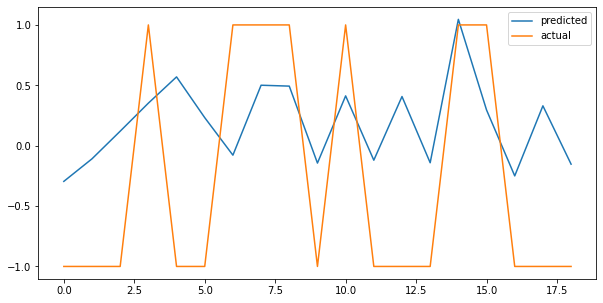

In [53]:
x_hat = x_test
y_hat = model.predict(x_hat)

pyplot.figure()
pyplot.figure( figsize =(10, 5 ))
pyplot.plot(y_hat, label = "predicted")
pyplot.plot(y_test,label = "actual")

pyplot.legend(prop={'size': 10})

print("Evaluate : {}".format(np.average((y_hat - y_test)**2)))

# 실험 2번

In [2]:
# 모델 구성

model2 = Sequential()

model2.add(Dense(units=512, input_dim=4, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=1))

In [24]:
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [25]:
es = EarlyStopping(patience=10)

# 모델 트레이닝 
seed = 128
np.random.seed(seed)
hist = model2.fit(x_train, y_train, epochs=500, batch_size=1, callbacks=[es])

Epoch 1/500
246/246 [==============================] - 2s 2ms/step - loss: 1.0055 - mae: 0.9895
Epoch 2/500
246/246 [==============================] - 0s 2ms/step - loss: 0.9792 - mae: 0.9715
Epoch 3/500
246/246 [==============================] - 0s 2ms/step - loss: 0.9375 - mae: 0.9341
Epoch 4/500
246/246 [==============================] - 0s 2ms/step - loss: 0.9325 - mae: 0.9264
Epoch 5/500
246/246 [==============================] - 1s 2ms/step - loss: 0.8552 - mae: 0.8522
Epoch 6/500
246/246 [==============================] - 0s 2ms/step - loss: 0.8655 - mae: 0.8701
Epoch 7/500
246/246 [==============================] - 0s 2ms/step - loss: 0.8781 - mae: 0.8793
Epoch 8/500
246/246 [==============================] - 0s 2ms/step - loss: 0.9034 - mae: 0.8766
Epoch 9/500
246/246 [==============================] - 0s 2ms/step - loss: 0.8627 - mae: 0.8658
Epoch 10/500
246/246 [==============================] - 0s 2ms/step - loss: 0.8658 - mae: 0.8568
Epoch 11/500
246/246 [=================

246/246 [==============================] - 0s 2ms/step - loss: 0.7464 - mae: 0.7512
Epoch 76/500
246/246 [==============================] - 0s 2ms/step - loss: 0.7347 - mae: 0.7560
Epoch 77/500
246/246 [==============================] - 0s 2ms/step - loss: 0.7395 - mae: 0.7484
Epoch 78/500
246/246 [==============================] - 1s 2ms/step - loss: 0.7296 - mae: 0.7484
Epoch 79/500
246/246 [==============================] - 1s 2ms/step - loss: 0.7511 - mae: 0.7515
Epoch 80/500
246/246 [==============================] - 1s 2ms/step - loss: 0.7269 - mae: 0.7471
Epoch 81/500
246/246 [==============================] - 1s 2ms/step - loss: 0.7506 - mae: 0.7597
Epoch 82/500
246/246 [==============================] - 1s 2ms/step - loss: 0.7274 - mae: 0.7339
Epoch 83/500
246/246 [==============================] - 1s 2ms/step - loss: 0.7400 - mae: 0.7537
Epoch 84/500
246/246 [==============================] - 0s 2ms/step - loss: 0.7353 - mae: 0.7603
Epoch 85/500
246/246 [=====================

246/246 [==============================] - 1s 2ms/step - loss: 0.4884 - mae: 0.5245
Epoch 150/500
246/246 [==============================] - 0s 2ms/step - loss: 0.5136 - mae: 0.5338
Epoch 151/500
246/246 [==============================] - 0s 2ms/step - loss: 0.5292 - mae: 0.5522
Epoch 152/500
246/246 [==============================] - 0s 2ms/step - loss: 0.5981 - mae: 0.5861
Epoch 153/500
246/246 [==============================] - 0s 2ms/step - loss: 0.4859 - mae: 0.5511
Epoch 154/500
246/246 [==============================] - 0s 2ms/step - loss: 0.6207 - mae: 0.5949
Epoch 155/500
246/246 [==============================] - 0s 2ms/step - loss: 0.4797 - mae: 0.5198
Epoch 156/500
246/246 [==============================] - 0s 2ms/step - loss: 0.4499 - mae: 0.4924
Epoch 157/500
246/246 [==============================] - 1s 2ms/step - loss: 0.4902 - mae: 0.5016
Epoch 158/500
246/246 [==============================] - 1s 2ms/step - loss: 0.5586 - mae: 0.5579
Epoch 159/500
246/246 [===========

246/246 [==============================] - 0s 2ms/step - loss: 0.3182 - mae: 0.3584
Epoch 224/500
246/246 [==============================] - 0s 2ms/step - loss: 0.3850 - mae: 0.3969
Epoch 225/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2825 - mae: 0.3176
Epoch 226/500
246/246 [==============================] - 0s 2ms/step - loss: 0.5584 - mae: 0.5086
Epoch 227/500
246/246 [==============================] - 0s 2ms/step - loss: 0.4988 - mae: 0.5099
Epoch 228/500
246/246 [==============================] - 0s 2ms/step - loss: 0.5505 - mae: 0.5485
Epoch 229/500
246/246 [==============================] - 0s 2ms/step - loss: 0.4083 - mae: 0.4711
Epoch 230/500
246/246 [==============================] - 0s 2ms/step - loss: 0.3463 - mae: 0.3849
Epoch 231/500
246/246 [==============================] - 0s 2ms/step - loss: 0.3225 - mae: 0.3478
Epoch 232/500
246/246 [==============================] - 0s 2ms/step - loss: 0.3025 - mae: 0.3361
Epoch 233/500
246/246 [===========

246/246 [==============================] - 0s 2ms/step - loss: 0.3690 - mae: 0.3916
Epoch 298/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2478 - mae: 0.2828
Epoch 299/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2457 - mae: 0.2817
Epoch 300/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2501 - mae: 0.2828
Epoch 301/500
246/246 [==============================] - 0s 2ms/step - loss: 0.1854 - mae: 0.2358
Epoch 302/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2848 - mae: 0.2886
Epoch 303/500
246/246 [==============================] - 0s 2ms/step - loss: 0.1797 - mae: 0.2310
Epoch 304/500
246/246 [==============================] - 0s 2ms/step - loss: 0.1971 - mae: 0.2220
Epoch 305/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2350 - mae: 0.2587
Epoch 306/500
246/246 [==============================] - 0s 2ms/step - loss: 0.3212 - mae: 0.3122
Epoch 307/500
246/246 [===========

246/246 [==============================] - 0s 2ms/step - loss: 0.2070 - mae: 0.2380
Epoch 372/500
246/246 [==============================] - 0s 2ms/step - loss: 0.1580 - mae: 0.2046
Epoch 373/500
246/246 [==============================] - 0s 2ms/step - loss: 0.1828 - mae: 0.2216
Epoch 374/500
246/246 [==============================] - 0s 2ms/step - loss: 0.3143 - mae: 0.3048
Epoch 375/500
246/246 [==============================] - 0s 2ms/step - loss: 0.1919 - mae: 0.2503
Epoch 376/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2520 - mae: 0.2733
Epoch 377/500
246/246 [==============================] - 0s 2ms/step - loss: 0.1077 - mae: 0.1545
Epoch 378/500
246/246 [==============================] - 0s 2ms/step - loss: 0.0869 - mae: 0.1395
Epoch 379/500
246/246 [==============================] - 0s 2ms/step - loss: 0.1839 - mae: 0.2123
Epoch 380/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2013 - mae: 0.2167
Epoch 381/500
246/246 [===========

246/246 [==============================] - 0s 2ms/step - loss: 0.3380 - mae: 0.3984
Epoch 446/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2988 - mae: 0.3604
Epoch 447/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2729 - mae: 0.3161
Epoch 448/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2658 - mae: 0.3102
Epoch 449/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2332 - mae: 0.2774
Epoch 450/500
246/246 [==============================] - 0s 2ms/step - loss: 0.3052 - mae: 0.3171
Epoch 451/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2862 - mae: 0.3268
Epoch 452/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2560 - mae: 0.2842
Epoch 453/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2835 - mae: 0.3213
Epoch 454/500
246/246 [==============================] - 0s 2ms/step - loss: 0.2189 - mae: 0.2671
Epoch 455/500
246/246 [===========

In [26]:
res = model2.evaluate(x_test, y_test, batch_size=16)
print("loss",res[0],"mae",res[1])

2/2 [==============================] - 0s 9ms/step - loss: 0.8514 - mae: 0.5686
loss 0.8514135479927063 mae 0.5685703158378601


Evaluate : 1.645657154731877


<Figure size 432x288 with 0 Axes>

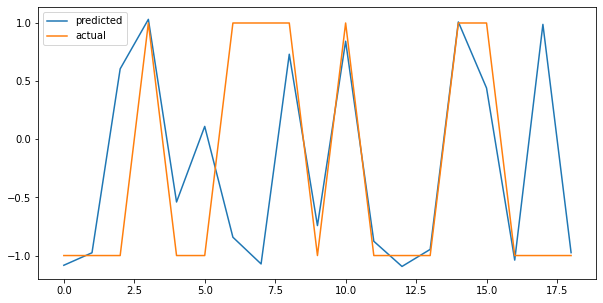

In [27]:
x_hat = x_test
y_hat = model2.predict(x_hat)

pyplot.figure()
pyplot.figure( figsize =(10, 5 ))
pyplot.plot(y_hat, label = "predicted")
pyplot.plot(y_test,label = "actual")

pyplot.legend(prop={'size': 10})

print("Evaluate : {}".format(np.average((y_hat - y_test)**2)))

In [36]:
from keras import models
from keras import layers
from keras import optimizers

In [40]:
# 모델 구성

model3 = Sequential()

model3.add(Dense(units=512, input_dim=4, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=32, activation='relu'))
model3.add(Dense(units=1))

model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [41]:
es = EarlyStopping(patience=10)

# 모델 트레이닝 
seed = 128
np.random.seed(seed)
hist = model2.fit(x_train, y_train, epochs=2000, batch_size=1, callbacks=[es])

Epoch 1/2000
246/246 [==============================] - 1s 2ms/step - loss: 0.1126 - mae: 0.1571
Epoch 2/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2219 - mae: 0.2285
Epoch 3/2000
246/246 [==============================] - 1s 2ms/step - loss: 0.1336 - mae: 0.1720
Epoch 4/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0799 - mae: 0.1148
Epoch 5/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0712 - mae: 0.0957
Epoch 6/2000
246/246 [==============================] - 1s 2ms/step - loss: 0.0693 - mae: 0.1033
Epoch 7/2000
246/246 [==============================] - 1s 2ms/step - loss: 0.0950 - mae: 0.1289
Epoch 8/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0823 - mae: 0.1274
Epoch 9/2000
246/246 [==============================] - 1s 2ms/step - loss: 0.0911 - mae: 0.1266
Epoch 10/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2890 - mae: 0.2941
Epoch 11/2000
246/246 [======

246/246 [==============================] - 0s 2ms/step - loss: 0.1138 - mae: 0.1530
Epoch 76/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0570 - mae: 0.1111
Epoch 77/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1071 - mae: 0.1412
Epoch 78/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2318 - mae: 0.2310
Epoch 79/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1643 - mae: 0.2103
Epoch 80/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0614 - mae: 0.1084
Epoch 81/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0499 - mae: 0.0870
Epoch 82/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0404 - mae: 0.0851
Epoch 83/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1807 - mae: 0.1807
Epoch 84/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2139 - mae: 0.2313
Epoch 85/2000
246/246 [===========

Epoch 149/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1028 - mae: 0.1542
Epoch 150/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0532 - mae: 0.0919
Epoch 151/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0911 - mae: 0.1295
Epoch 152/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1126 - mae: 0.1444
Epoch 153/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1941 - mae: 0.2320
Epoch 154/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1041 - mae: 0.1495
Epoch 155/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0640 - mae: 0.1049
Epoch 156/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0801 - mae: 0.1165
Epoch 157/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1171 - mae: 0.1463
Epoch 158/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0995 - mae: 0.1275
Epoch 159/

Epoch 186/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1233 - mae: 0.1435
Epoch 187/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0542 - mae: 0.0949
Epoch 188/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0538 - mae: 0.0889
Epoch 189/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0433 - mae: 0.0798
Epoch 190/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0394 - mae: 0.0678
Epoch 191/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0622 - mae: 0.0925
Epoch 192/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0717 - mae: 0.1019
Epoch 193/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1739 - mae: 0.1956
Epoch 194/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1352 - mae: 0.1691
Epoch 195/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1522 - mae: 0.1952
Epoch 196/

Epoch 223/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1580 - mae: 0.2015
Epoch 224/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0597 - mae: 0.1110
Epoch 225/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0973 - mae: 0.1370
Epoch 226/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0484 - mae: 0.0907
Epoch 227/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0453 - mae: 0.0822
Epoch 228/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1130 - mae: 0.1424
Epoch 229/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0794 - mae: 0.1087
Epoch 230/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0356 - mae: 0.0765
Epoch 231/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0822 - mae: 0.1162
Epoch 232/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0737 - mae: 0.0988
Epoch 233/

Epoch 260/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0596 - mae: 0.0922
Epoch 261/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0285 - mae: 0.0658
Epoch 262/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2072 - mae: 0.2104
Epoch 263/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2487 - mae: 0.2679
Epoch 264/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1497 - mae: 0.1891
Epoch 265/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1018 - mae: 0.1294
Epoch 266/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0617 - mae: 0.1077
Epoch 267/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0414 - mae: 0.0792
Epoch 268/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0694 - mae: 0.1014
Epoch 269/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1301 - mae: 0.1488
Epoch 270/

Epoch 297/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0947 - mae: 0.1349
Epoch 298/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0849 - mae: 0.1266
Epoch 299/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1083 - mae: 0.1319
Epoch 300/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0604 - mae: 0.1088
Epoch 301/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0671 - mae: 0.0967
Epoch 302/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0385 - mae: 0.0714
Epoch 303/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0770 - mae: 0.1044
Epoch 304/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2000 - mae: 0.2075
Epoch 305/2000
246/246 [==============================] - 1s 2ms/step - loss: 0.1060 - mae: 0.1525
Epoch 306/2000
246/246 [==============================] - 1s 2ms/step - loss: 0.0206 - mae: 0.0564
Epoch 307/

Epoch 334/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0602 - mae: 0.1087
Epoch 335/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1141 - mae: 0.1449
Epoch 336/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0884 - mae: 0.1277
Epoch 337/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1603 - mae: 0.1945
Epoch 338/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0946 - mae: 0.1328
Epoch 339/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1806 - mae: 0.2068
Epoch 340/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1449 - mae: 0.1730
Epoch 341/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0766 - mae: 0.1263
Epoch 342/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1600 - mae: 0.1997
Epoch 343/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0524 - mae: 0.1031
Epoch 344/

Epoch 371/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1074 - mae: 0.1413
Epoch 372/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1384 - mae: 0.1708
Epoch 373/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1065 - mae: 0.1518
Epoch 374/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0353 - mae: 0.0856
Epoch 375/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1167 - mae: 0.1363
Epoch 376/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0584 - mae: 0.0951
Epoch 377/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1087 - mae: 0.1352
Epoch 378/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2747 - mae: 0.2687
Epoch 379/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1375 - mae: 0.1835
Epoch 380/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0485 - mae: 0.0957
Epoch 381/

Epoch 408/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0430 - mae: 0.0827
Epoch 409/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1280 - mae: 0.1610
Epoch 410/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1340 - mae: 0.1668
Epoch 411/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1100 - mae: 0.1445
Epoch 412/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1339 - mae: 0.1750
Epoch 413/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1021 - mae: 0.1638
Epoch 414/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0500 - mae: 0.1034
Epoch 415/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0317 - mae: 0.0721
Epoch 416/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0680 - mae: 0.1095
Epoch 417/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2002 - mae: 0.2117
Epoch 418/

Epoch 445/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0795 - mae: 0.1091
Epoch 446/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0642 - mae: 0.0830
Epoch 447/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0487 - mae: 0.0819
Epoch 448/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0411 - mae: 0.0667
Epoch 449/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0373 - mae: 0.0677
Epoch 450/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 0.0766
Epoch 451/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0377 - mae: 0.0726
Epoch 452/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2958 - mae: 0.2692
Epoch 453/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0604 - mae: 0.1080
Epoch 454/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0567 - mae: 0.0863
Epoch 455/

Epoch 482/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1170 - mae: 0.1563
Epoch 483/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0469 - mae: 0.0939
Epoch 484/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0372 - mae: 0.0796
Epoch 485/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0349 - mae: 0.0729
Epoch 486/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0410 - mae: 0.0725
Epoch 487/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0325 - mae: 0.0586
Epoch 488/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0396 - mae: 0.0738
Epoch 489/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0339 - mae: 0.0661
Epoch 490/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0394 - mae: 0.0662
Epoch 491/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0367 - mae: 0.0614
Epoch 492/

Epoch 519/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2215 - mae: 0.2668
Epoch 520/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0807 - mae: 0.1345
Epoch 521/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0784 - mae: 0.1147
Epoch 522/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0286 - mae: 0.0753
Epoch 523/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.0542
Epoch 524/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0297 - mae: 0.0609
Epoch 525/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.1567
Epoch 526/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1171 - mae: 0.1687
Epoch 527/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1040 - mae: 0.1245
Epoch 528/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0192 - mae: 0.0607
Epoch 529/

Epoch 556/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0389
Epoch 557/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0129 - mae: 0.0473
Epoch 558/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0423 - mae: 0.0771
Epoch 559/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.3807 - mae: 0.3527
Epoch 560/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1456 - mae: 0.1923
Epoch 561/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0925 - mae: 0.1335
Epoch 562/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0262 - mae: 0.0726
Epoch 563/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0196 - mae: 0.0558
Epoch 564/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0462 - mae: 0.0743
Epoch 565/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0413 - mae: 0.0715
Epoch 566/

Epoch 593/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0612 - mae: 0.0997
Epoch 594/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0909 - mae: 0.1235
Epoch 595/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1524 - mae: 0.1659
Epoch 596/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1046 - mae: 0.1358
Epoch 597/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2357 - mae: 0.2544
Epoch 598/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1256 - mae: 0.1559
Epoch 599/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0540 - mae: 0.0920
Epoch 600/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0308 - mae: 0.0758
Epoch 601/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0239 - mae: 0.0496
Epoch 602/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0354 - mae: 0.0659
Epoch 603/

Epoch 630/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2354 - mae: 0.2536
Epoch 631/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1290 - mae: 0.1688
Epoch 632/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0982 - mae: 0.1446
Epoch 633/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0691 - mae: 0.1147
Epoch 634/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0965 - mae: 0.1311
Epoch 635/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0638 - mae: 0.1030
Epoch 636/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0915 - mae: 0.1224
Epoch 637/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1255 - mae: 0.1468
Epoch 638/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1527 - mae: 0.1827
Epoch 639/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0620 - mae: 0.0984
Epoch 640/

Epoch 667/2000
246/246 [==============================] - 0s 2ms/step - loss: 3.1775e-04 - mae: 0.0133
Epoch 668/2000
246/246 [==============================] - 0s 2ms/step - loss: 5.3864e-04 - mae: 0.0168
Epoch 669/2000
246/246 [==============================] - 0s 2ms/step - loss: 4.7644e-04 - mae: 0.0159
Epoch 670/2000
246/246 [==============================] - 0s 2ms/step - loss: 4.0895e-04 - mae: 0.0143
Epoch 671/2000
246/246 [==============================] - 0s 2ms/step - loss: 7.1764e-04 - mae: 0.0202
Epoch 672/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1068 - mae: 0.1175
Epoch 673/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.3593 - mae: 0.3820
Epoch 674/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2137 - mae: 0.2610
Epoch 675/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1671 - mae: 0.1961
Epoch 676/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0898 - ma

Epoch 704/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1417 - mae: 0.1437
Epoch 705/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0875 - mae: 0.1263
Epoch 706/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0256 - mae: 0.0601
Epoch 707/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2020 - mae: 0.2045
Epoch 708/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2033 - mae: 0.2340
Epoch 709/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0819 - mae: 0.1156
Epoch 710/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0704 - mae: 0.1052
Epoch 711/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0599 - mae: 0.0941
Epoch 712/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1093 - mae: 0.1252
Epoch 713/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1040 - mae: 0.1336
Epoch 714/

Epoch 741/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1299 - mae: 0.1565
Epoch 742/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2015 - mae: 0.2115
Epoch 743/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2476 - mae: 0.2734
Epoch 744/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0910 - mae: 0.1466
Epoch 745/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1116 - mae: 0.1450
Epoch 746/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1458 - mae: 0.1772
Epoch 747/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0550 - mae: 0.0920
Epoch 748/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0725 - mae: 0.1116
Epoch 749/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0813 - mae: 0.1143
Epoch 750/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0559 - mae: 0.0922
Epoch 751/

Epoch 778/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0758 - mae: 0.1259
Epoch 779/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0271 - mae: 0.0649
Epoch 780/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0278 - mae: 0.0670
Epoch 781/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0284 - mae: 0.0587
Epoch 782/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0581 - mae: 0.0778
Epoch 783/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1891 - mae: 0.2093
Epoch 784/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2034 - mae: 0.2175
Epoch 785/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0913 - mae: 0.1374
Epoch 786/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0466 - mae: 0.0891
Epoch 787/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0382 - mae: 0.0641
Epoch 788/

Epoch 815/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0870 - mae: 0.1223
Epoch 816/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1875 - mae: 0.2185
Epoch 817/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1183 - mae: 0.1502
Epoch 818/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0497 - mae: 0.0914
Epoch 819/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1155 - mae: 0.1408
Epoch 820/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0596 - mae: 0.1089
Epoch 821/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0447 - mae: 0.0872
Epoch 822/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0363 - mae: 0.0747
Epoch 823/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0303 - mae: 0.0687
Epoch 824/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.0564
Epoch 825/

Epoch 852/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0455 - mae: 0.0587
Epoch 853/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0622 - mae: 0.0837
Epoch 854/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1110 - mae: 0.1657
Epoch 855/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1505 - mae: 0.1873
Epoch 856/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1134 - mae: 0.1585
Epoch 857/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0984 - mae: 0.1277
Epoch 858/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0374 - mae: 0.0748
Epoch 859/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0271 - mae: 0.0671
Epoch 860/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0410 - mae: 0.0708
Epoch 861/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0420 - mae: 0.0687
Epoch 862/

Epoch 889/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 0.0782
Epoch 890/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1012 - mae: 0.1342
Epoch 891/2000
246/246 [==============================] - 1s 2ms/step - loss: 0.0710 - mae: 0.1201
Epoch 892/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0741 - mae: 0.1189
Epoch 893/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0258 - mae: 0.0787
Epoch 894/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0230 - mae: 0.0684
Epoch 895/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0372 - mae: 0.0791
Epoch 896/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0677 - mae: 0.1130
Epoch 897/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0481 - mae: 0.0925
Epoch 898/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0951 - mae: 0.1203
Epoch 899/

Epoch 926/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0723 - mae: 0.1150
Epoch 927/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0878 - mae: 0.1254
Epoch 928/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0809 - mae: 0.1209
Epoch 929/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0774 - mae: 0.1114
Epoch 930/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0836 - mae: 0.1206
Epoch 931/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0568 - mae: 0.1061
Epoch 932/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0314 - mae: 0.0764
Epoch 933/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0806 - mae: 0.1050
Epoch 934/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0350 - mae: 0.0742
Epoch 935/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.0558
Epoch 936/

Epoch 963/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0519 - mae: 0.0969
Epoch 964/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0503 - mae: 0.0885
Epoch 965/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0347 - mae: 0.0670
Epoch 966/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0500 - mae: 0.0867
Epoch 967/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1183 - mae: 0.1486
Epoch 968/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0463 - mae: 0.1046
Epoch 969/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0269 - mae: 0.0726
Epoch 970/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0230 - mae: 0.0565
Epoch 971/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.0571
Epoch 972/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0407 - mae: 0.0721
Epoch 973/

Epoch 1000/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0194 - mae: 0.0491
Epoch 1001/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0315 - mae: 0.0585
Epoch 1002/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0753 - mae: 0.1091
Epoch 1003/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.3106 - mae: 0.2937
Epoch 1004/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0586 - mae: 0.1279
Epoch 1005/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0280 - mae: 0.0760
Epoch 1006/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0153 - mae: 0.0507
Epoch 1007/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0633 - mae: 0.1020
Epoch 1008/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0618 - mae: 0.1036
Epoch 1009/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0313 - mae: 0.0712


Epoch 1037/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0828 - mae: 0.1173
Epoch 1038/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0561
Epoch 1039/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0045 - mae: 0.0334
Epoch 1040/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0272
Epoch 1041/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0017 - mae: 0.0215
Epoch 1042/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0282
Epoch 1043/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0262
Epoch 1044/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0250
Epoch 1045/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0010 - mae: 0.0200
Epoch 1046/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0082 - mae: 0.0284


Epoch 1074/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0146 - mae: 0.0511
Epoch 1075/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0192 - mae: 0.0494
Epoch 1076/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0181 - mae: 0.0475
Epoch 1077/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0123 - mae: 0.0407
Epoch 1078/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0161 - mae: 0.0462
Epoch 1079/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0318 - mae: 0.0525
Epoch 1080/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0503 - mae: 0.0742
Epoch 1081/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0358 - mae: 0.0746
Epoch 1082/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1024 - mae: 0.1276
Epoch 1083/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1253 - mae: 0.1545


Epoch 1111/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0173 - mae: 0.0360
Epoch 1112/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0298 - mae: 0.0535
Epoch 1113/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1501 - mae: 0.1620
Epoch 1114/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1669 - mae: 0.2053
Epoch 1115/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1435 - mae: 0.1658
Epoch 1116/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1307 - mae: 0.1619
Epoch 1117/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0527 - mae: 0.0909
Epoch 1118/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0338 - mae: 0.0651
Epoch 1119/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0239 - mae: 0.0521
Epoch 1120/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0176 - mae: 0.0459


Epoch 1148/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0471 - mae: 0.0911
Epoch 1149/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0588 - mae: 0.0965
Epoch 1150/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.1670
Epoch 1151/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0994 - mae: 0.1516
Epoch 1152/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0870 - mae: 0.1293
Epoch 1153/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1167 - mae: 0.1475
Epoch 1154/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0657 - mae: 0.0977
Epoch 1155/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0242 - mae: 0.0682
Epoch 1156/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0167 - mae: 0.0504
Epoch 1157/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0385


Epoch 1185/2000
246/246 [==============================] - 1s 2ms/step - loss: 0.0779 - mae: 0.1050
Epoch 1186/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1134 - mae: 0.1259
Epoch 1187/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0520 - mae: 0.0969
Epoch 1188/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0240 - mae: 0.0553
Epoch 1189/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1987 - mae: 0.2163
Epoch 1190/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1443 - mae: 0.1634
Epoch 1191/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0356 - mae: 0.0832
Epoch 1192/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.0592
Epoch 1193/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0159 - mae: 0.0470
Epoch 1194/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0144 - mae: 0.0420


Epoch 1222/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0253 - mae: 0.0591
Epoch 1223/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2109 - mae: 0.2221
Epoch 1224/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0311 - mae: 0.0882
Epoch 1225/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0603 - mae: 0.0904
Epoch 1226/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0858 - mae: 0.1120
Epoch 1227/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0730 - mae: 0.1017
Epoch 1228/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0173 - mae: 0.0653
Epoch 1229/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0323 - mae: 0.0701
Epoch 1230/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0380 - mae: 0.0655
Epoch 1231/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1187 - mae: 0.1493


Epoch 1259/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0093 - mae: 0.0494
Epoch 1260/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0120 - mae: 0.0464
Epoch 1261/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0278 - mae: 0.0598
Epoch 1262/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0209 - mae: 0.0542
Epoch 1263/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0159 - mae: 0.0385
Epoch 1264/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0257 - mae: 0.0548
Epoch 1265/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0124 - mae: 0.0469
Epoch 1266/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0249 - mae: 0.0554
Epoch 1267/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1381 - mae: 0.1494
Epoch 1268/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1565 - mae: 0.1762


Epoch 1296/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0054 - mae: 0.0329
Epoch 1297/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0027 - mae: 0.0265
Epoch 1298/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0384 - mae: 0.0662
Epoch 1299/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0219 - mae: 0.0453
Epoch 1300/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0176 - mae: 0.0377
Epoch 1301/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0168 - mae: 0.0398
Epoch 1302/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0193 - mae: 0.0427
Epoch 1303/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1370 - mae: 0.1550
Epoch 1304/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1275 - mae: 0.1676
Epoch 1305/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0925 - mae: 0.1216


Epoch 1333/2000
246/246 [==============================] - 0s 2ms/step - loss: 7.9000e-04 - mae: 0.0175
Epoch 1334/2000
246/246 [==============================] - 0s 2ms/step - loss: 5.4962e-04 - mae: 0.0137
Epoch 1335/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0010 - mae: 0.0162
Epoch 1336/2000
246/246 [==============================] - 0s 2ms/step - loss: 9.8804e-04 - mae: 0.0164
Epoch 1337/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0187
Epoch 1338/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0020 - mae: 0.0216
Epoch 1339/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.0349
Epoch 1340/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.3939 - mae: 0.3774
Epoch 1341/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1713 - mae: 0.2498
Epoch 1342/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0838 - 

Epoch 1370/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0816 - mae: 0.1069
Epoch 1371/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0835 - mae: 0.1273
Epoch 1372/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0509
Epoch 1373/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0026 - mae: 0.0285
Epoch 1374/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0015 - mae: 0.0233
Epoch 1375/2000
246/246 [==============================] - 0s 2ms/step - loss: 8.6418e-04 - mae: 0.0178
Epoch 1376/2000
246/246 [==============================] - 0s 2ms/step - loss: 6.9374e-04 - mae: 0.0168
Epoch 1377/2000
246/246 [==============================] - 0s 2ms/step - loss: 5.6909e-04 - mae: 0.0142
Epoch 1378/2000
246/246 [==============================] - 0s 2ms/step - loss: 3.8246e-04 - mae: 0.0117
Epoch 1379/2000
246/246 [==============================] - 0s 2ms/step - loss: 4.772

Epoch 1407/2000
246/246 [==============================] - 0s 2ms/step - loss: 1.9578e-04 - mae: 0.0099
Epoch 1408/2000
246/246 [==============================] - 0s 2ms/step - loss: 2.0249e-04 - mae: 0.0097
Epoch 1409/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0185
Epoch 1410/2000
246/246 [==============================] - 0s 2ms/step - loss: 3.1940e-04 - mae: 0.0123
Epoch 1411/2000
246/246 [==============================] - 0s 2ms/step - loss: 2.9796e-04 - mae: 0.0122
Epoch 1412/2000
246/246 [==============================] - 0s 2ms/step - loss: 2.9969e-04 - mae: 0.0118
Epoch 1413/2000
246/246 [==============================] - 0s 2ms/step - loss: 2.6957e-04 - mae: 0.0115
Epoch 1414/2000
246/246 [==============================] - 0s 2ms/step - loss: 4.4329e-04 - mae: 0.0139
Epoch 1415/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0010 - mae: 0.0207
Epoch 1416/2000
246/246 [==============================] - 0s 2ms/step -

Epoch 1480/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0336 - mae: 0.0899
Epoch 1481/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0262 - mae: 0.0643
Epoch 1482/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1006 - mae: 0.1222
Epoch 1483/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0581 - mae: 0.0877
Epoch 1484/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0839 - mae: 0.1176
Epoch 1485/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1341 - mae: 0.1431
Epoch 1486/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0218 - mae: 0.0608
Epoch 1487/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0024 - mae: 0.0307
Epoch 1488/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0214
Epoch 1489/2000
246/246 [==============================] - 0s 2ms/step - loss: 7.4456e-04 - mae: 0.0

Epoch 1553/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0915 - mae: 0.1334
Epoch 1554/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0240 - mae: 0.0815
Epoch 1555/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0368 - mae: 0.0816
Epoch 1556/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0358 - mae: 0.0754
Epoch 1557/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0443 - mae: 0.0877
Epoch 1558/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0294 - mae: 0.0549
Epoch 1559/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1350 - mae: 0.1857
Epoch 1560/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0753 - mae: 0.1104
Epoch 1561/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0168 - mae: 0.0709
Epoch 1562/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0198 - mae: 0.0533


Epoch 1590/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0019 - mae: 0.0230
Epoch 1591/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0042 - mae: 0.0260
Epoch 1592/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1247 - mae: 0.1478
Epoch 1593/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0899 - mae: 0.1280
Epoch 1594/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0925 - mae: 0.1303
Epoch 1595/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0486 - mae: 0.0860
Epoch 1596/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0551 - mae: 0.0968
Epoch 1597/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0375
Epoch 1598/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0527 - mae: 0.0736
Epoch 1599/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0281 - mae: 0.0789


Epoch 1627/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0231 - mae: 0.0691
Epoch 1628/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1195 - mae: 0.1445
Epoch 1629/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.2761 - mae: 0.2753
Epoch 1630/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1433 - mae: 0.1898
Epoch 1631/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0669 - mae: 0.1126
Epoch 1632/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0284 - mae: 0.0734
Epoch 1633/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0155 - mae: 0.0445
Epoch 1634/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0403
Epoch 1635/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0071 - mae: 0.0311
Epoch 1636/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0077 - mae: 0.0326


Epoch 1664/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0837 - mae: 0.1075
Epoch 1665/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0574 - mae: 0.0941
Epoch 1666/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0627 - mae: 0.0868
Epoch 1667/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0408 - mae: 0.0819
Epoch 1668/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0146 - mae: 0.0427
Epoch 1669/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0098 - mae: 0.0351
Epoch 1670/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0082 - mae: 0.0293
Epoch 1671/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0098 - mae: 0.0286
Epoch 1672/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0071 - mae: 0.0347
Epoch 1673/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0196 - mae: 0.0408


Epoch 1701/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0839 - mae: 0.1003
Epoch 1702/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1342 - mae: 0.1501
Epoch 1703/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1069 - mae: 0.1416
Epoch 1704/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0585
Epoch 1705/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.0553
Epoch 1706/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0138 - mae: 0.0386
Epoch 1707/2000
246/246 [==============================] - 1s 2ms/step - loss: 0.0028 - mae: 0.0269
Epoch 1708/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0270
Epoch 1709/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.0459
Epoch 1710/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0722 - mae: 0.0757


Epoch 1738/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0675 - mae: 0.1040
Epoch 1739/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1425 - mae: 0.1554
Epoch 1740/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0978 - mae: 0.1246
Epoch 1741/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0337 - mae: 0.0681
Epoch 1742/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0213 - mae: 0.0469
Epoch 1743/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0226 - mae: 0.0487
Epoch 1744/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0412 - mae: 0.0622
Epoch 1745/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0418 - mae: 0.0593
Epoch 1746/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0783 - mae: 0.0895
Epoch 1747/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0093 - mae: 0.0356


Epoch 1811/2000
246/246 [==============================] - 0s 2ms/step - loss: 2.2407e-04 - mae: 0.0097
Epoch 1812/2000
246/246 [==============================] - 0s 2ms/step - loss: 2.4743e-04 - mae: 0.0113
Epoch 1813/2000
246/246 [==============================] - 0s 2ms/step - loss: 1.9485e-04 - mae: 0.0097
Epoch 1814/2000
246/246 [==============================] - 0s 2ms/step - loss: 2.5323e-04 - mae: 0.0103
Epoch 1815/2000
246/246 [==============================] - 0s 2ms/step - loss: 6.1260e-04 - mae: 0.0183
Epoch 1816/2000
246/246 [==============================] - 0s 2ms/step - loss: 5.5904e-04 - mae: 0.0167
Epoch 1817/2000
246/246 [==============================] - 0s 2ms/step - loss: 5.2371e-04 - mae: 0.0158
Epoch 1818/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0016 - mae: 0.0244
Epoch 1819/2000
246/246 [==============================] - 0s 2ms/step - loss: 9.4397e-04 - mae: 0.0195
Epoch 1820/2000
246/246 [==============================] - 0s 2ms/st

Epoch 1884/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0339
Epoch 1885/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0102 - mae: 0.0416
Epoch 1886/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0680 - mae: 0.0979
Epoch 1887/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0585 - mae: 0.0934
Epoch 1888/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0343 - mae: 0.0647
Epoch 1889/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0316 - mae: 0.0689
Epoch 1890/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0542 - mae: 0.0871
Epoch 1891/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0831 - mae: 0.1276
Epoch 1892/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0907 - mae: 0.1177
Epoch 1893/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0121 - mae: 0.0547


Epoch 1921/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0347 - mae: 0.0822
Epoch 1922/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0404 - mae: 0.0859
Epoch 1923/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0371 - mae: 0.0804
Epoch 1924/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0374 - mae: 0.0816
Epoch 1925/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0571 - mae: 0.0931
Epoch 1926/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0232 - mae: 0.0649
Epoch 1927/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0235 - mae: 0.0551
Epoch 1928/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0161 - mae: 0.0521
Epoch 1929/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0288 - mae: 0.0664
Epoch 1930/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1235 - mae: 0.1442


Epoch 1958/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0636 - mae: 0.0855
Epoch 1959/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0589 - mae: 0.0973
Epoch 1960/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.1234 - mae: 0.1535
Epoch 1961/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0863 - mae: 0.1215
Epoch 1962/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0810 - mae: 0.1144
Epoch 1963/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0414 - mae: 0.0674
Epoch 1964/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0350 - mae: 0.0620
Epoch 1965/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0358 - mae: 0.0790
Epoch 1966/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0405 - mae: 0.0858
Epoch 1967/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0400 - mae: 0.0718


Epoch 1995/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0992 - mae: 0.1338
Epoch 1996/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0122 - mae: 0.0530
Epoch 1997/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0030 - mae: 0.0316
Epoch 1998/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.0495
Epoch 1999/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0150 - mae: 0.0420
Epoch 2000/2000
246/246 [==============================] - 0s 2ms/step - loss: 0.0169 - mae: 0.0351


Evaluate : 1.02475020303193


<Figure size 432x288 with 0 Axes>

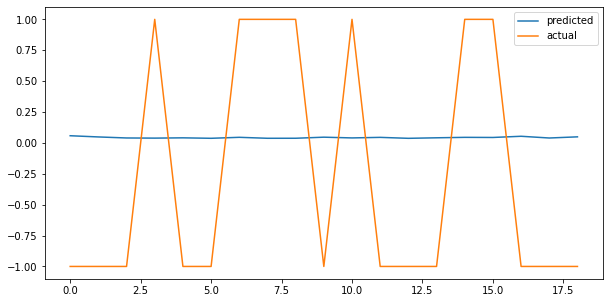

In [42]:
x_hat = x_test
y_hat = model3.predict(x_hat)

pyplot.figure()
pyplot.figure( figsize =(10, 5 ))
pyplot.plot(y_hat, label = "predicted")
pyplot.plot(y_test,label = "actual")

pyplot.legend(prop={'size': 10})

print("Evaluate : {}".format(np.average((y_hat - y_test)**2)))

## SimpleRNN

In [56]:
from keras.layers import SimpleRNN
from keras.layers import Embedding

In [67]:
model_RNN = Sequential()
model_RNN.add(Embedding(x_train.shape[0],x_train.shape[1]))
model_RNN.add(SimpleRNN(32))
model_RNN.add(Dense(1, activation='sigmoid'))

In [68]:
model_RNN.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [69]:
es = EarlyStopping(patience=10)

seed = 128
np.random.seed(seed)

history = model_RNN.fit(x_train, y_train,
                   epochs=200,
                   batch_size=8,
                   callbacks=[es]
                   )

Epoch 1/200
31/31 [==============================] - 1s 7ms/step - loss: 0.5957 - acc: 0.1016
Epoch 2/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4351 - acc: 0.0000e+00
Epoch 3/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4181 - acc: 0.0000e+00
Epoch 4/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4261 - acc: 0.0000e+00
Epoch 5/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4202 - acc: 0.0000e+00
Epoch 6/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4180 - acc: 0.0000e+00
Epoch 7/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4170 - acc: 0.0000e+00
Epoch 8/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4163 - acc: 0.0000e+00
Epoch 9/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4216 - acc: 0.0000e+00
Epoch 10/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4104 - acc: 0.0000e+00
Epoch 11/200
31/31 [===

Epoch 38/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3927 - acc: 0.0041
Epoch 39/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4099 - acc: 0.0041
Epoch 40/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4116 - acc: 0.0041
Epoch 41/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4055 - acc: 0.0041
Epoch 42/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4085 - acc: 0.0041
Epoch 43/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4058 - acc: 0.0041
Epoch 44/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4031 - acc: 0.0081
Epoch 45/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3994 - acc: 0.0041
Epoch 46/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3994 - acc: 0.0081
Epoch 47/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4042 - acc: 0.0081
Epoch 48/200
31/31 [==============================

Epoch 76/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3813 - acc: 0.0081
Epoch 77/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3871 - acc: 0.0081
Epoch 78/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3901 - acc: 0.0081
Epoch 79/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3758 - acc: 0.0081
Epoch 80/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3852 - acc: 0.0081
Epoch 81/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3803 - acc: 0.0081
Epoch 82/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3793 - acc: 0.0081
Epoch 83/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3780 - acc: 0.0081
Epoch 84/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3780 - acc: 0.0081
Epoch 85/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3839 - acc: 0.0081
Epoch 86/200
31/31 [==============================

Epoch 114/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3631 - acc: 0.0081
Epoch 115/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3630 - acc: 0.0081
Epoch 116/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3691 - acc: 0.0081
Epoch 117/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3718 - acc: 0.0081
Epoch 118/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3629 - acc: 0.0081
Epoch 119/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3628 - acc: 0.0081
Epoch 120/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3615 - acc: 0.0081
Epoch 121/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3653 - acc: 0.0081
Epoch 122/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3620 - acc: 0.0081
Epoch 123/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3599 - acc: 0.0081
Epoch 124/200
31/31 [===================

Epoch 189/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3156 - acc: 0.0081
Epoch 190/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3169 - acc: 0.0081
Epoch 191/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3164 - acc: 0.0081
Epoch 192/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3185 - acc: 0.0081
Epoch 193/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3158 - acc: 0.0081
Epoch 194/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3197 - acc: 0.0081
Epoch 195/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3172 - acc: 0.0081
Epoch 196/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3157 - acc: 0.0081
Epoch 197/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3139 - acc: 0.0081
Epoch 198/200
31/31 [==============================] - 0s 7ms/step - loss: 0.3086 - acc: 0.0081
Epoch 199/200
31/31 [===================

Evaluate : 1.09568068114859


<Figure size 432x288 with 0 Axes>

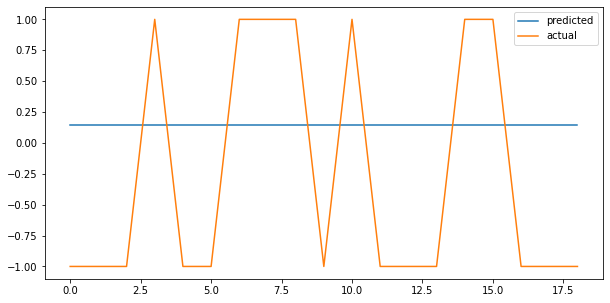

In [70]:
x_hat = x_test
y_hat = model_RNN.predict(x_hat)

pyplot.figure()
pyplot.figure(figsize =(10, 5 ))
pyplot.plot(y_hat, label = "predicted")
pyplot.plot(y_test,label = "actual")

pyplot.legend(prop={'size': 10})

print("Evaluate : {}".format(np.average((y_hat - y_test)**2)))

## Simple LSTM

In [71]:
from keras.layers import LSTM

In [77]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(x_train.shape[0], 32))
model_LSTM.add(LSTM(32))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [78]:
es = EarlyStopping(patience=10)

seed = 128
np.random.seed(seed)

history = model_LSTM.fit(x_train, y_train,
                   epochs=50,
                   batch_size=8,
                   callbacks=[es]
                   )

Epoch 1/50
31/31 [==============================] - 8s 4ms/step - loss: 0.6036 - acc: 0.0122
Epoch 2/50
31/31 [==============================] - 0s 4ms/step - loss: 0.4632 - acc: 0.0000e+00
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 0.4195 - acc: 0.0000e+00
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 0.4170 - acc: 0.0000e+00
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 0.4235 - acc: 0.0000e+00
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: 0.4123 - acc: 0.0000e+00
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 0.4198 - acc: 0.0000e+00
Epoch 8/50
31/31 [==============================] - 0s 4ms/step - loss: 0.4085 - acc: 0.0000e+00
Epoch 9/50
31/31 [==============================] - 0s 4ms/step - loss: 0.4185 - acc: 0.0000e+00
Epoch 10/50
31/31 [==============================] - 0s 4ms/step - loss: 0.4163 - acc: 0.0000e+00
Epoch 11/50
31/31 [==============

Evaluate : 1.0683282979694768


<Figure size 432x288 with 0 Axes>

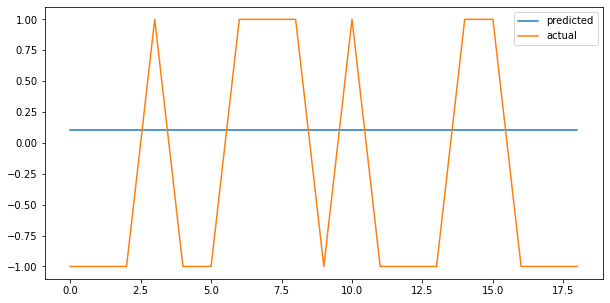

In [82]:
x_hat = x_test
y_hat = model_LSTM.predict(x_hat)

pyplot.figure()
pyplot.figure(figsize =(10, 5 ))
pyplot.plot(y_hat, label = "predicted")
pyplot.plot(y_test,label = "actual")

pyplot.legend(prop={'size': 10})

print("Evaluate : {}".format(np.average((y_hat - y_test)**2)))

## LSTM 2nd

In [249]:
PATH = "C:/Users/ANDlab3/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/DataSet.xlsx"

In [250]:
df_scaled = pd.read_excel(PATH)

C:\Users\ANDlab3\AppData\Local\Temp/ipykernel_14168/960643764.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_scaled = pd.read_excel(PATH)


In [251]:
df_scaled.head()

,Date,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score,label
0,2020-10-05,0.087519,0.086175,0.448550,0.460961,1
1,2020-10-06,0.095129,0.119490,0.230537,0.320265,1
2,2020-10-07,0.115398,0.077477,0.321843,0.379190,1
3,2020-10-08,0.120234,0.153428,0.505174,0.497504,1
4,2020-10-12,0.131572,0.113318,0.474480,0.477695,1


In [252]:
def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [253]:
train = df_scaled['Date'] <= '2021-09-30'
test = df_scaled['Date'] > '2021-09-30'

In [254]:
train = df_scaled[train]
test = df_scaled[test]

In [255]:
feature_cols = ['Scaled CP Score','Scaled volume Score','Scaled Senti Kospi Score','Scaled Senti stock Score']
label_cols = ['Scaled CP Score']

In [256]:
train_feature = train[feature_cols]
train_label = train[label_cols]

In [257]:
train_feature, train_label = make_dataset(train_feature, train_label, 10)

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size= 0.1)

In [260]:
print(x_train.shape)
print(x_valid.shape)

(212, 10, 4)
(24, 10, 4)


In [261]:
test_feature = test[feature_cols]
test_label = test[label_cols]

In [262]:
test_feature, test_label = make_dataset(test_feature, test_label, 10)

In [263]:
print(test_feature.shape)
print(test_label.shape)

(9, 10, 4)
(9, 1)


In [264]:
type(test_feature)

numpy.ndarray

In [265]:
type(train_feature)

numpy.ndarray

In [177]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
import os

In [266]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [267]:
model.compile(loss='mean_squared_error', optimizer='adam')
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# filename = os.path.join(model_path, 'tmp_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid)) 
#                     ,callbacks=[early_stop, checkpoint])

Epoch 1/200
14/14 [==============================] - 1s 27ms/step - loss: 0.9745 - val_loss: 0.7672
Epoch 2/200
14/14 [==============================] - 0s 21ms/step - loss: 0.5601 - val_loss: 0.4268
Epoch 3/200
14/14 [==============================] - 0s 22ms/step - loss: 0.2965 - val_loss: 0.1978
Epoch 4/200
14/14 [==============================] - 0s 22ms/step - loss: 0.1250 - val_loss: 0.0584
Epoch 5/200
14/14 [==============================] - 0s 22ms/step - loss: 0.0494 - val_loss: 0.0216
Epoch 6/200
14/14 [==============================] - 0s 22ms/step - loss: 0.0250 - val_loss: 0.0121
Epoch 7/200
14/14 [==============================] - 0s 21ms/step - loss: 0.0134 - val_loss: 0.0063
Epoch 8/200
14/14 [==============================] - 0s 21ms/step - loss: 0.0075 - val_loss: 0.0056
Epoch 9/200
14/14 [==============================] - 0s 21ms/step - loss: 0.0063 - val_loss: 0.0057
Epoch 10/200
14/14 [==============================] - 0s 21ms/step - loss: 0.0061 - val_loss: 0.0052

14/14 [==============================] - 0s 21ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 163/200
14/14 [==============================] - 0s 22ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 164/200
14/14 [==============================] - 0s 22ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 165/200
14/14 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 166/200
14/14 [==============================] - 0s 22ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 167/200
14/14 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 168/200
14/14 [==============================] - 0s 21ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 169/200
14/14 [==============================] - 0s 22ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 170/200
14/14 [==============================] - 0s 22ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 171/200
14/14 [==============================] - 0s 23ms/step - loss: 0.0014 - val_loss: 0

In [268]:
# 예측
pred = model.predict(test_feature)

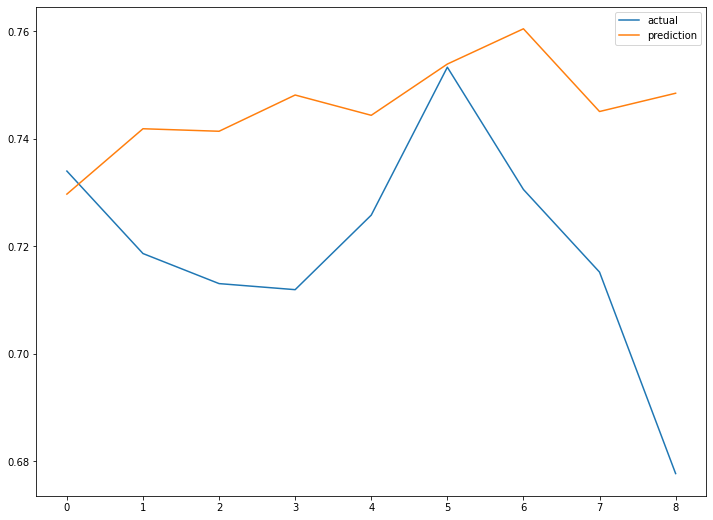

In [269]:
pyplot.figure(figsize=(12, 9))
pyplot.plot(test_label, label='actual')
pyplot.plot(pred, label='prediction')
pyplot.legend()
pyplot.show()

In [273]:
res = model.evaluate(test_feature, test_label, batch_size=8)
res

2/2 [==============================] - 0s 6ms/step - loss: 0.0011


0.0010878420434892178